<a href="https://colab.research.google.com/github/SelvamathanS/K-Means-Clustering-for-mall-customer-analysis/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
d = pd.read_csv("/content/drive/MyDrive/Notes/Ai training 5.1.26 onwards/Dataset/Mall_Customers.csv")
d.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
d.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual_Income_(k$),0
Spending_Score,0


In [ ]:
d.shape

(200, 5)

In [ ]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income_(k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [ ]:
x = d[['Annual_Income_(k$)', 'Spending_Score']]

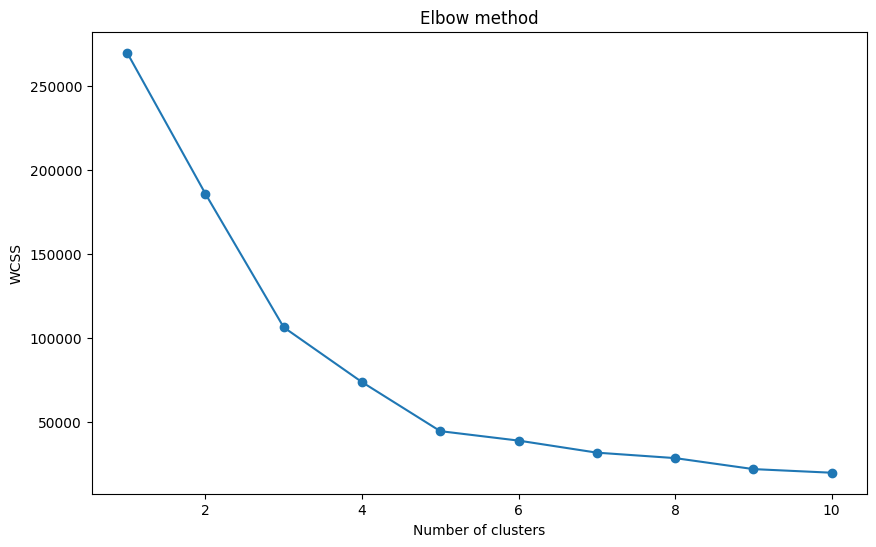

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=36)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
x = d[['Annual_Income_(k$)', 'Spending_Score']]
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=42)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

In [ ]:
kmeans.inertia_

44448.45544793369

In [ ]:
kmeans.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

/tmp/ipython-input-748331781.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


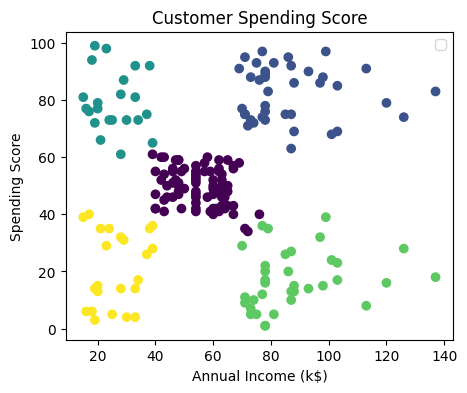

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(x['Annual_Income_(k$)'],x['Spending_Score'],c=kmeans.labels_)
# plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=5, label='Cluster 1', color='blue')

# plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=5, label='Cluster 2', color='green')

# plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=5, label='Cluster 3', color='gray')

# plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s=5, label='Cluster 4', color='yellow')

# plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4,1], s=5, label='Cluster 5', color='black')

# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=5, c='red', marker=',', label='Centroids')
# plt.grid(False)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Customer Spending Score')
plt.legend()
plt.show()

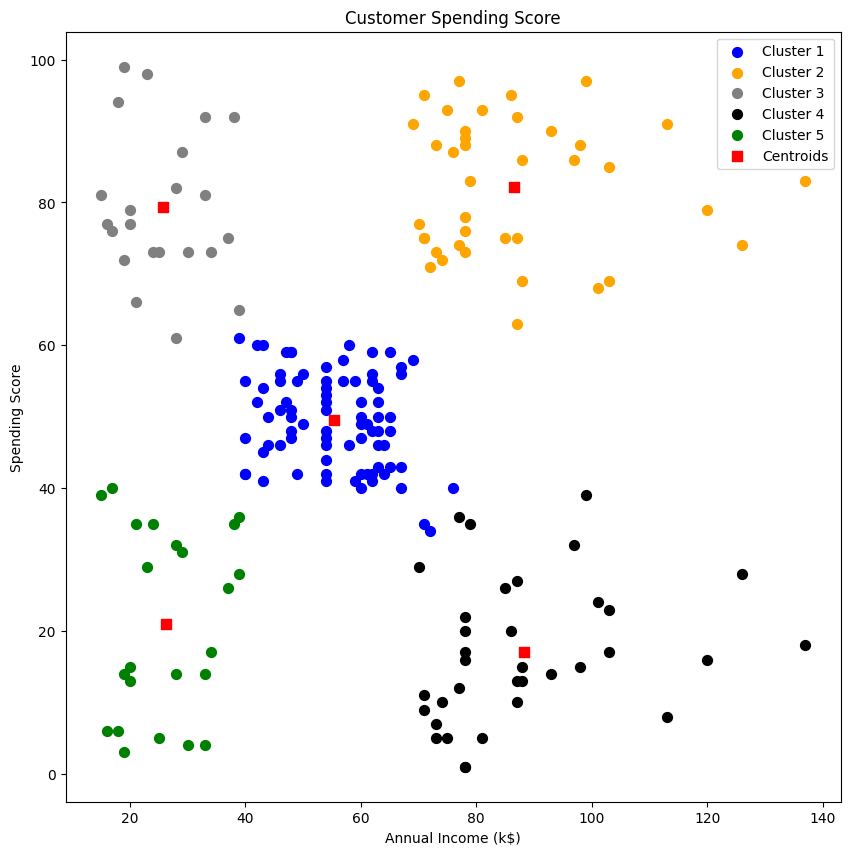

In [ ]:
plt.figure(figsize=(10, 10))
# plt.scatter(x['Annual_Income_(k$)'],x['Spending_Score'],c=kmeans.labels_)
plt.scatter(x[y_kmeans == 0].iloc[:,0], x[y_kmeans == 0].iloc[:,1], s=50, label='Cluster 1', color='blue')

plt.scatter(x[y_kmeans == 1].iloc[:,0], x[y_kmeans == 1].iloc[:,1], s=50, label='Cluster 2', color='orange')

plt.scatter(x[y_kmeans == 2].iloc[:,0], x[y_kmeans == 2].iloc[:,1], s=50, label='Cluster 3', color='gray')

plt.scatter(x[y_kmeans == 3].iloc[:,0], x[y_kmeans == 3].iloc[:,1], s=50, label='Cluster 4', color='black')

plt.scatter(x[y_kmeans == 4].iloc[:,0], x[y_kmeans == 4].iloc[:,1], s=50, label='Cluster 5', color='green')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red', marker=',', label='Centroids')
plt.grid(False)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Customer Spending Score')
plt.legend()
plt.show()